In [1]:
import sys
sys.path.append('..')

In [24]:
import pickle
import pandas as pd
from bs4 import BeautifulSoup

In [3]:
from curry.loader import Loader

In [4]:
loader = Loader()

In [5]:
df, _, _ = loader.sublessons_w_content(False, None)

In [6]:
df.shape

(11667, 7)

In [7]:
soups = df.groupby('grundwissen_url').content.first().apply(BeautifulSoup)

/home/rsebastian/.anaconda3/envs/curry/lib/python3.7/site-packages/pandas/core/apply.py:1101: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 1101 of the file /home/rsebastian/.anaconda3/envs/curry/lib/python3.7/site-packages/pandas/core/apply.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  convert=self.convert_dtype,


In [8]:
def get_summary(soup):
    topic_teaser = soup.find('div', {'class':'topic_teaser'})
    ul = topic_teaser.find('ul')
    if ul is None:
        return ('nonli', [topic_teaser.text.strip()])
    else:
        return ('li', [li.text for li in ul.find_all('li')])

In [9]:
wichtigste = [get_summary(s) for s in soups]

In [10]:
wichtigste_df = pd.DataFrame(wichtigste, columns=['struct', 'points'], index = soups.index)

In [11]:
wichtigste_df['point_len'] = wichtigste_df.points.apply(len)

<AxesSubplot:>

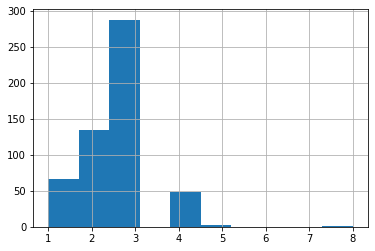

In [12]:
wichtigste_df.point_len.hist()

In [13]:
wichtigste_df.struct.value_counts()

li       491
nonli     48
Name: struct, dtype: int64

In [14]:
all_points = wichtigste_df[wichtigste_df.struct == 'li'].points.apply(pd.Series).stack().reset_index(drop=True)

In [15]:
all_points

0       Jede Eigenschwingung lässt sich eindeutig aus ...
1       Die Klanghöhe wird durch den Grundton (Frequen...
2       Die Klangfarbe wird durch die Obertöne bestimm...
3       Schall entsteht durch in Bewegung bringen eine...
4       Schall breitet sich aus, indem sich die Bewegu...
                              ...                        
1355     Im Alltag treten oft mehrere Arten gemeinsam auf
1356    Häufig leistet eine Transportart den mit Absta...
1357    Man unterscheidet zwischen natürlichem und vom...
1358    Der natürliche Treibhauseffekt macht die Erde ...
1359    Der menschengemachte Treibhauseffekt durch Aus...
Length: 1360, dtype: object

In [17]:
with open('../data/learning_objectives.txt', 'a') as f:
    for point in all_points:
        f.write(point + '\n')

In [27]:
with open('../data/learning_objectives.txt_encoded', 'rb') as f:
    all_points_encoded = pickle.load(f)

In [28]:
all_points_encoded.shape

(1388, 512)

In [29]:
from sklearn.decomposition import PCA

In [39]:
from sklearn.manifold import TSNE

In [40]:
pca = PCA(n_components=2)

In [41]:
tsne = TSNE(n_components=2)

In [42]:
X2_tsne = tsne.fit_transform(all_points_encoded)

/home/rsebastian/.anaconda3/envs/curry/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/rsebastian/.anaconda3/envs/curry/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [43]:
X2_pca = pca.fit_transform(all_points_encoded)

In [44]:
from matplotlib import pyplot as plt

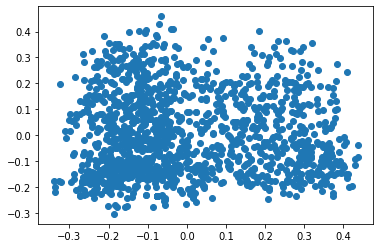

In [45]:
plt.scatter(X2_pca[:, 0], X2_pca[:, 1])

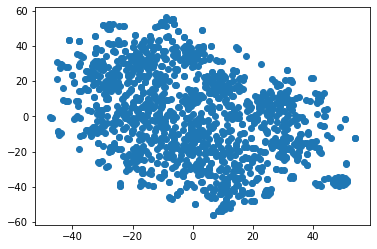

In [46]:
plt.scatter(X2_tsne[:, 0], X2_tsne[:, 1])

In [47]:
def get_content(soup):
    return [p.text for p in soup.find_all('p')if len(p.text) > 100]

In [48]:
contents = [get_content(soup) for soup in soups]

In [54]:
contents[0]

['Bei den Saiteninstrumenten wird eine gespannte Saite durch Zupfen, Streichen oder durch den Schlag eines kleinen Hammers (z.B. Klavier) zu Schwingungen angeregt. Dabei können recht komplexe Schwingungsformen auftreten, die deutlich von den sinusförmigen stehenden Wellen wie wir sie am Gummiseil beobachtet haben, abweichen.',
 'Grundsätzlich ist eine schwingende Saite keine sehr intensive Schallquelle, da durch sie nur wenig Luft in Bewegung gesetzt wird. Daher wird die gespannte Saite über einen sogenannten Steg geführt. Dieser wiederum überträgt die Schwingungen auf einen Holzkörper z.B. den Korpus einer Violine, der eine im Verhältnis zur Saite wesentlich größere Oberfläche besitzt.',
 'Zupfst du\xa0eine Saite in ihrer Mitte an, so schwingt die Saite als Ganzes nicht sinusförmig. Vielmehr erinnert die Schwingungsform an ein Dreieck bzw. an eine Rampe. Im Folgenden wollen wir als einfaches Modell einer schwingenden Saite diese Dreiecksschwingung benutzen.',
 'Der französische Mathem

<AxesSubplot:>

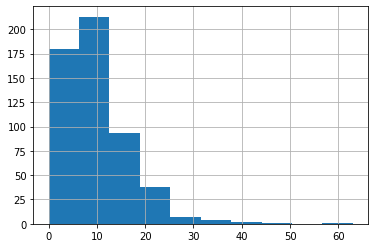

In [53]:
pd.Series(contents)

In [36]:
pd.Series([t.name for t in soups[0].find_all()]).value_counts().sort_values(ascending=False)

a             194
li            168
div           159
source         72
script         60
img            23
picture        23
p              22
ul             22
span           21
input          14
h4              9
meta            9
label           9
h2              7
link            6
i               5
strong          4
nav             4
figcaption      3
canvas          2
h3              2
ol              1
h1              1
form            1
head            1
header          1
body            1
title           1
figure          1
h5              1
html            1
dtype: int64

In [11]:
oer = pd.read_csv('../../elixier-scraper/data/elixier_physics_all.csv', index_col=0)
oer

,themenbereich,titel für schüler,ortsbezüge,lange beschreibung,herausgeber,anbieter,lernressourcentyp,lizenz,beschreibung für schüler,title,...,bildungsebene,schlagwörter,höchstalter,sprache,description,geeignet für,mindestalter,url,domain,is_pdf
0,Schule mathematisch-naturwissenschaftliche Fäc...,NaN,NaN,NaN,NaN,NaN,Arbeitsblatt,"Keine Angabe, es gilt die gesetzliche Regelung",NaN,Neptun in Opposition zur Sonne,...,Sekundarstufe I Sekundarstufe II,Astronomie Planet Sekundarstufe I Sekundarstuf...,Lehrer Online: 18,Deutsch,Am 17. August 2009 steht der Planet Neptun im ...,Lehrer; Schüler,Lehrer Online: 10,http://www.lehrer-online.de/neptun-uranus.php,www.lehrer-online.de,False
1,Schule mathematisch-naturwissenschaftliche Fäc...,NaN,NaN,NaN,NaN,NaN,Arbeitsblatt,"Keine Angabe, es gilt die gesetzliche Regelung",NaN,Der Venustransit am 8. Juni 2004,...,Sekundarstufe I Sekundarstufe II,Physik Astronomie Planet Himmelskörper Sekunda...,Lehrer Online: 18,Deutsch,Mit XEphem können Sie den Transit oder andere ...,Lehrer; Schüler,Lehrer Online: 10,http://www.lehrer-online.de/venustransit-2004.php,www.lehrer-online.de,False
2,Schule mathematisch-naturwissenschaftliche Fäc...,NaN,NaN,NaN,NaN,NaN,Arbeitsblatt,"Keine Angabe, es gilt die gesetzliche Regelung",NaN,Virtuelle Experimente zur Elektrizitätslehre,...,Sekundarstufe I,Physik Elektrizität Sekundarstufe I Elektrizit...,Lehrer Online: 14,Deutsch,Viele interaktive Flash-Applikationen der Phys...,Lehrer; Schüler,Lehrer Online: 10,http://www.lehrer-online.de/virtuelle-elektriz...,www.lehrer-online.de,False
3,Schule mathematisch-naturwissenschaftliche Fäc...,NaN,NaN,NaN,NaN,NaN,Arbeitsblatt,"Keine Angabe, es gilt die gesetzliche Regelung",NaN,Simulation einer Wellenwanne,...,Sekundarstufe I Sekundarstufe II,Physik Wellenlehre Sekundarstufe II,Lehrer Online: 18,Deutsch,Eine Software zur Simulation einer Wellenwanne...,Lehrer; Schüler,Lehrer Online: 15,http://www.lehrer-online.de/wellenwanne.php,www.lehrer-online.de,False
4,Schule mathematisch-naturwissenschaftliche Fäc...,NaN,NaN,NaN,NaN,NaN,Arbeitsblatt,"Keine Angabe, es gilt die gesetzliche Regelung",NaN,Physix,...,Sekundarstufe I Sekundarstufe II,Lernsoftware Physik,Lehrer Online: 18,Deutsch,Newtons Gesetze für die Klassen 10 und 11 unte...,Lehrer; Schüler,Lehrer Online: 15,http://www.lehrer-online.de/physix.php,www.lehrer-online.de,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,Schule Sprachen und Literatur Deutsch Nichtlit...,NaN,Antarktis; Grönland,NaN,NaN,NaN,Text; Arbeitsblatt,keine Angabe,NaN,forscher - Das Magazin für Neugierige: Leinen ...,...,Primarstufe Sekundarstufe I,Zeitschrift Forscher Forschung Müll Abfall Mee...,15,de,Eine unerwartete Entdeckung haben die Jugendli...,Schüler,6,https://www.forscher-online.de/fileadmin/user_...,www.forscher-online.de,True
2895,Schule mathematisch-naturwissenschaftliche Fäc...,NaN,NaN,NaN,NaN,NaN,Arbeitsblatt,keine Angabe,NaN,Lingo macht MINT: Heft 6 - Feuer auf der Erde,...,Primarstufe Sekundarstufe I,Deutsch als Zweitsprache Deutsch als Fremdspra...,15,de,Feuer ist eines der usprünglichsten und faszin...,Schüler; Lehrer,6,https://www.lingonetz.de/schule/lingo-macht-mi...,www.lingonetz.de,False
2896,Schule Sprachen und Literatur Deutsch Nichtlit...,NaN,NaN,NaN,NaN,NaN,Text; Arbeitsblatt,keine Angabe,NaN,forscher - Das Magazin für Neugierige: Stadt s...,...,Primarstufe Sekundarstufe I,Zeitschrift Forscher Forschung Stadt Nahrung L...,15,de,Was ist hier echt und was nur eine Idee? Wir z...,Schüler,6,https://www.forscher-online.de/fileadmin/user_...,www.forscher-online.de,True
2897,Schule mathematisch-naturwissenschaftliche Fäc...,NaN,NaN,NaN,NaN,NaN,Arbeitsblatt,"Keine Angabe, es gilt die gesetzliche Regelung",NaN,Energiespiel 2010,...,Sekundarstufe I Sekundarstufe II,Ökologie Grundschule Technik,Lehrer Online: 18,Deutsch,Energie einmal ganz anders: Die Schülerinnen u...,Lehrer; Schüler,Lehrer Online: 10,http://www.lehrer-online.de/energiesp